<a href="https://colab.research.google.com/github/TutuBraz/netflix_content_based_recommender/blob/main/netflix_content_based_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix TV Shows and Movies
### Movies and TV Shows listings on Netflix (July, 2022)

https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies

Tasks:


1.   Developing a content-based recommender system using the genres and/or descriptions.
2.   Identifying the main content available on the streaming.
3.   Network analysis on the cast of the titles.
4. Exploratory data analysis to find interesting insights.







saaty - algoritmo de rec antigo
redes bayseanas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#library to convert string into list
import ast

In [ ]:
df_titles = pd.read_csv('/content/titles.csv')


# Compreendendo o dataframe

In [ ]:
df_titles.head(4)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811


In [ ]:
df_titles.shape

(5850, 15)

In [ ]:
df_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [ ]:
df_titles.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

In [ ]:
#Retirando colunas que não serão usadas
#Retirando valores não essenciais para análise
df_titles.drop(['id','imdb_id','imdb_votes','tmdb_popularity', 'imdb_score','tmdb_score', 'seasons', 'age_certification'], axis=1, inplace=True)
df_titles.head()

,title,type,description,release_year,runtime,genres,production_countries
0,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,51,['documentation'],['US']
1,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"['drama', 'crime']",['US']
2,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,109,"['drama', 'action', 'thriller', 'european']",['US']
3,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,91,"['fantasy', 'action', 'comedy']",['GB']
4,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,150,"['war', 'action']","['GB', 'US']"


In [ ]:
df_titles.isnull().sum()

title                    1
type                     0
description             18
release_year             0
runtime                  0
genres                   0
production_countries     0
dtype: int64

In [ ]:
#Excluindo valores que precisam estar preenchidos
df_titles.dropna(axis=0, inplace=True)

In [ ]:
#tipo de conteúdo
set(df_titles.type)

{'MOVIE', 'SHOW'}

As colunas genres e production_countries serão normalizadas pela First Normal Form.


1.   https://www.pythonpool.com/python-code-to-convert-a-table-to-first-normal-form/
2.   https://www.kaggle.com/code/atlas7/demo-1nf-normalise-str-list-column



## Tratando valores da coluna genres

In [ ]:
#Verificando se posso usar 1NF
df_titles.duplicated().sum()

0

In [ ]:
df_titles.genres.value_counts()

['comedy']                                                       484
['documentation']                                                328
['drama']                                                        327
['comedy', 'drama']                                              135
['drama', 'romance']                                             124
                                                                ... 
['drama', 'war', 'action', 'thriller', 'history', 'european']      1
['thriller', 'crime', 'drama', 'western']                          1
['drama', 'scifi', 'fantasy', 'horror']                            1
['horror', 'fantasy', 'thriller']                                  1
['documentation', 'music', 'reality']                              1
Name: genres, Length: 1726, dtype: int64

In [ ]:
#Cria uma coluna com os valores de genre no formato de lista
df_titles["genres2"] = df_titles["genres"].apply(ast.literal_eval)
df_titles.head()

,title,type,description,release_year,runtime,genres,production_countries,genres2
0,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,51,['documentation'],['US'],[documentation]
1,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"['drama', 'crime']",['US'],"[drama, crime]"
2,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,109,"['drama', 'action', 'thriller', 'european']",['US'],"[drama, action, thriller, european]"
3,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,91,"['fantasy', 'action', 'comedy']",['GB'],"[fantasy, action, comedy]"
4,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,150,"['war', 'action']","['GB', 'US']","[war, action]"


In [ ]:
#Conta quando valores possui na coluna
genres2_length = list(map(len, df_titles['genres2'].values))

In [ ]:
#Cria uma tabela normalizada 1NF, para o modelo

df_titles_normalised = pd.DataFrame({
        'title': np.repeat(df_titles['title'], genres2_length),
        'type': np.repeat(df_titles['type'], genres2_length),
        'description': np.repeat(df_titles['description'], genres2_length),
        'genres': np.concatenate(df_titles['genres2'].values)
        })

df_titles_normalised

,title,type,description,genres
0,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,documentation
1,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,drama
1,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,crime
2,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,drama
2,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,action
...,...,...,...,...
5846,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,drama
5847,Lokillo,MOVIE,A controversial TV host and comedian who has b...,comedy
5849,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",family
5849,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",animation


In [ ]:
df_titles_dummies = pd.get_dummies(df_titles_normalised, columns=['genres']) 
df_titles_dummies.head()

,title,type,description,genres_action,genres_animation,genres_comedy,genres_crime,genres_documentation,genres_drama,genres_european,...,genres_history,genres_horror,genres_music,genres_reality,genres_romance,genres_scifi,genres_sport,genres_thriller,genres_war,genres_western
0,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Normalizando produciton_country
Criando tabela que será utilizada para entender melhor os dados.

In [ ]:
df_titles_countries = pd.DataFrame(
    {
        'title': np.repeat(df_titles['title'], list(map(len, df_titles["production_countries"].apply(ast.literal_eval).values))),
        'type': np.repeat(df_titles['type'], list(map(len, df_titles["production_countries"].apply(ast.literal_eval).values))),
        'production_countries': np.concatenate(df_titles["production_countries"].apply(ast.literal_eval).values)

    })

df_titles_countries

,title,type,production_countries
0,Five Came Back: The Reference Films,SHOW,US
1,Taxi Driver,MOVIE,US
2,Deliverance,MOVIE,US
3,Monty Python and the Holy Grail,MOVIE,GB
4,The Dirty Dozen,MOVIE,GB
...,...,...,...
5843,My Bride,MOVIE,EG
5844,Bling Empire - The Afterparty,MOVIE,US
5845,Fine Wine,MOVIE,NG
5847,Lokillo,MOVIE,CO


# Análise.

In [ ]:
df_titles_analitics.describe()

,release_year,runtime
count,6528.000000,6528.000000
mean,2016.190257,79.677696
std,7.068096,38.466451
min,1945.000000,0.000000
25%,2016.000000,46.000000
50%,2018.000000,88.000000
75%,2020.000000,106.000000
max,2022.000000,240.000000


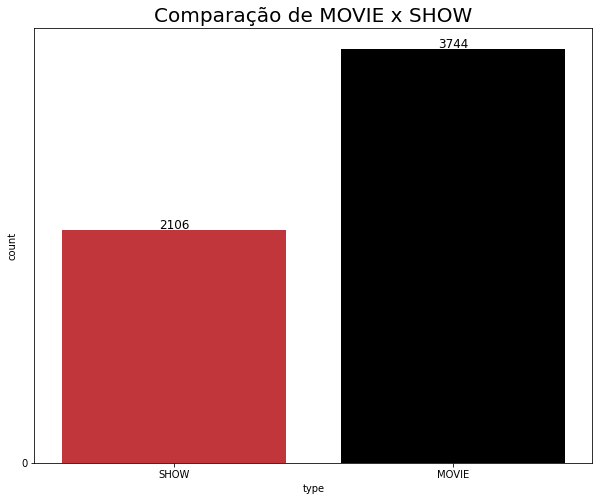

In [ ]:
#Verificando a distribuição dos filmes e das séries

#Cores netflix
netflix_palette = ["#D81F26", "#000000"]

#Tamanho da figura
plt.figure(figsize=(10,8))

#o tipo de gráfico
ax = sns.countplot(data=df_titles, x='type', palette=sns.set_palette(netflix_palette))

#Colocando rótulo nas barras
for i in ax.patches:
    ax.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center', va='baseline', fontsize=12,
                  color='black', xytext=(0, 1),
                  textcoords='offset points'
                  )
#Retirando valores do eixo y
plt.yticks([0])

#titúlo do gráfico
ax.set_title("Comparação de MOVIE x SHOW", fontsize=20)
plt.show()

Nota-se que a uma maior quantidade filmes do que de séries na plataforma.

## Distribuição dos conteúos em relação ao ano de lançamento.

In [ ]:
#Agrupamento das colunas 
grp_release_year = df_titles_analitics[['release_year', 'type', 'title']].groupby(['release_year', 'type']).count().sort_values(by='release_year', ascending=True)

#Pivotando o dataframe
pivot_release_year = grp_release_year.pivot_table(index ='release_year', columns='type', values='title')
pivot_release_year

type,MOVIE,SHOW
release_year,,
1945,NaN,1.0
1954,2.0,NaN
1956,1.0,NaN
1958,1.0,NaN
1959,1.0,NaN
...,...,...
2018,591.0,294.0
2019,613.0,307.0
2020,554.0,309.0


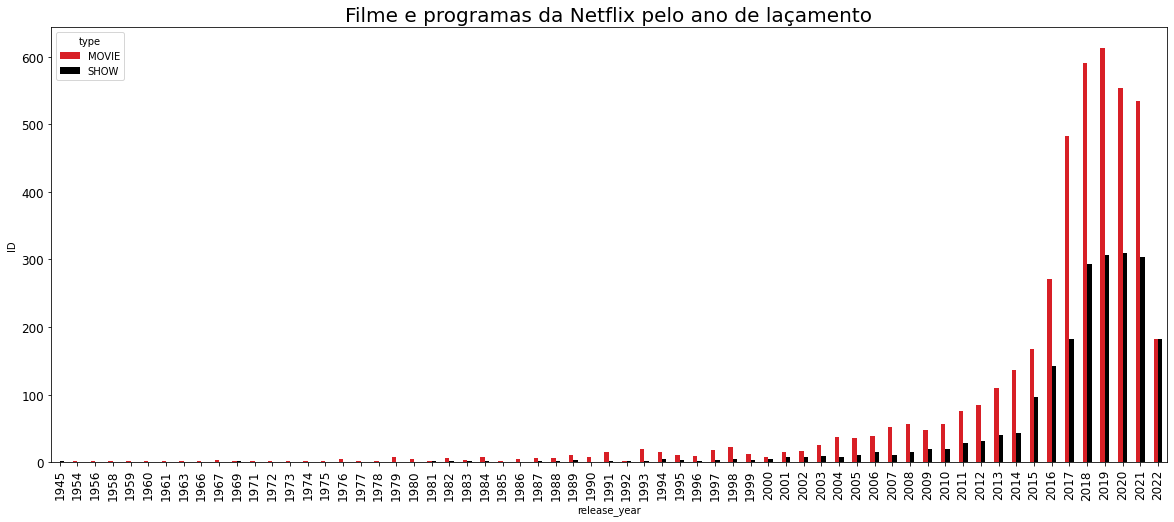

In [ ]:
#Plot da distribuição de contúdos da netflix com base no ano de lançamento
ax=pivot_release_year.plot(kind='bar', fontsize=12, figsize=(20,8),ylabel='ID',color=netflix_palette)
ax.set_title('Filme e programas da Netflix pelo ano de laçamento', fontsize=20);


Pode-se observar que a maioria dos conteúdos disponibilizados pela netflix até dia 22 julho de 2022, tem suas datas de produção mais recente.

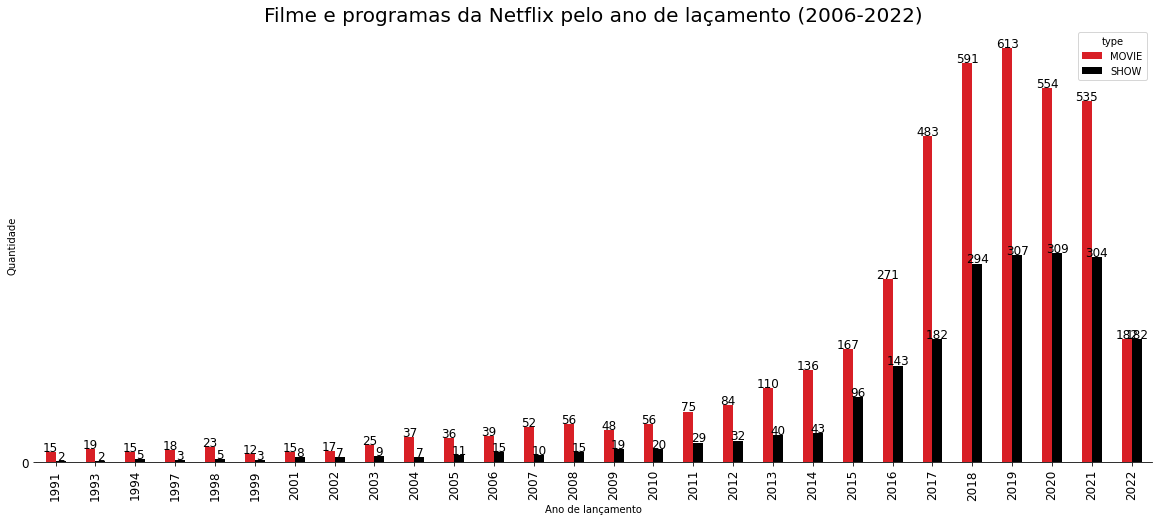

In [ ]:
#Plot
ax=pivot_release_year[(pivot_release_year.MOVIE >  10) | (pivot_release_year.SHOW > 10)].plot(kind='bar', fontsize=12, figsize=(20,8), ylabel='ID', color=netflix_palette)

#Título
ax.set_title('Filme e programas da Netflix pelo ano de laçamento (2006-2022)', fontsize=20)

#Eixo y
ax.set_ylabel('Quantidade', fontsize=10)
#Eixo x
ax.set_xlabel('Ano de lançamento', fontsize=10)

#Retidando a margem
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

#Colocando rótulo nas barras
for i in ax.patches:
    ax.annotate("%.0f" % i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center', va='baseline', fontsize=12,
                  color='black', xytext=(0, 1),
                  textcoords='offset points'
                  )
#Retirando valores do eixo y
plt.yticks([0]);

Existe uma crescente na quantidade de conteúdos disponibilizado pela plataformar, em especial no período de 2009 a 2018. E uma constância na quantidade dos conteúdos lançados entre 2018 a 2021, a tendência é que disponibilize uma quantidade parecida para o ano de 2022, lembrandando que os dados são referentes até julho de 2022.